Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Data

In [21]:
X_train = np.array([1,2,3,4,5])
y_train = np.array([10,21,31,41,51])

X_test = np.array([10])

In [22]:
m = X_train.shape
m

(5,)

Plotting the dataset

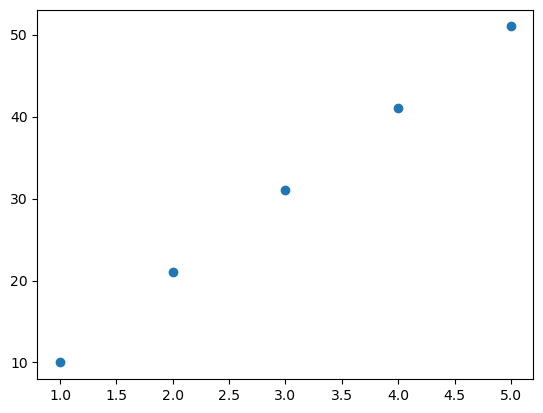

In [23]:
plt.scatter(X_train, y_train)
plt.show()

Compute cost function

###### Cost function gives an overall approximation of how good a ML model is. [Not to be confused with loss function, which also calculates error, but is used in the training phase, for evaluating the state of model during training]

In [24]:
def cost(x, y, w, b):
    m = x.shape
    tot_err = 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        err = (f_wb_i - y[i]) ** 2
        tot_err += err
    tot_cost = (1/2*m) * tot_err
    return tot_cost
    


Computing the gradient 

###### In machine learning, gradients are vectors that point in the direction of the steepest increase or decrease in a function. More specifically, they are the partial derivatives of a function with respect to its parameters.

In [25]:
def compute_gradient(x, y, w, b):
    dJ_dw, dJ_db = 0, 0
    m = x.shape
    for i in range(m):
        f_wb_i = w*x[i] + b                 # basic function

        dJ_dw_i += (f_wb_i - y[i])*x[i]     # we got this from 
        dJ_db_i += (f_wb_i - y[i])


    

SyntaxError: incomplete input (2680098266.py, line 2)